Import Libraries

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sn

Load the datasets

In [5]:
# Load the datasets A2-ring-separable.txt, A2-ring-merged.txt, A2-ring-test.txt as train_separable, train_merged, test_data respectively.
train_separable = pd.read_csv('A2-ring-separable.txt', sep='\t', header=None)
train_merged = pd.read_csv('A2-ring-merged.txt', sep='\t', header=None)
test_data = pd.read_csv('A2-ring-test.txt', sep='\t', header=None)

Separate Features and Target Variable

In [6]:
# Separate features and target variable
X_train_separable = train_separable.iloc[:, :-1].values
y_train_separable = train_separable.iloc[:, -1].values

X_train_merged = train_merged.iloc[:, :-1].values
y_train_merged = train_merged.iloc[:, -1].values

X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values

Use GridSearch to automate the process of looking for the best parameters

In [12]:
mlr_model = LogisticRegression()

# Define parameter grid for GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [100]
}

# Create GridSearchCV instance
grid_search_separable = GridSearchCV(mlr_model, param_grid, cv=5, scoring='accuracy')
grid_search_merged = GridSearchCV(mlr_model, param_grid, cv=5, scoring='accuracy')

# Perform grid search for Separable Ring Data
grid_search_separable.fit(X_train_separable, y_train_separable)

# Perform grid search for Merged Ring Data
grid_search_merged.fit(X_train_merged, y_train_merged)

# Get best parameters
best_params_separable = grid_search_separable.best_params_
best_params_merged = grid_search_merged.best_params_

# Print the best parameters and the corresponding accuracy
print("Best parameters for separable ring data: ", best_params_separable)
print("Best parameters for merged ring data: ", best_params_merged)

print("Best Accuracy Separable: ", grid_search_separable.best_score_)
print("Best Accuracy Merged: ", grid_search_merged.best_score_)



/home/joan/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/home/joan/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/joan/.local/lib/python3.10/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/joan/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.pe

Best parameters for separable ring data:  {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Best parameters for merged ring data:  {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy Separable:  0.5196
Best Accuracy Merged:  0.5515


/home/joan/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/home/joan/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/joan/.local/lib/python3.10/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/joan/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.pe

Use the best parameters for training and calculate the accuracy

In [8]:
# Train on the entire training set using the best parameters
mlr_model_separable = LogisticRegression(**best_params_separable)
mlr_model_merged = LogisticRegression(**best_params_merged)

mlr_model_separable.fit(X_train_separable, y_train_separable)
mlr_model_merged.fit(X_train_merged, y_train_merged)

# Predictions on the test set
test_pred_sep = mlr_model_separable.predict(X_test)
test_pred_merged = mlr_model_merged.predict(X_test)

# Calculate and print test accuracy
test_accuracy_sep = accuracy_score(y_test, test_pred_sep)
test_accuracy_merged = accuracy_score(y_test, test_pred_merged)

print("Test Accuracy for Separable Ring Data:", test_accuracy_sep)
print("Test Accuracy for Merged Ring Data:", test_accuracy_merged)

Test Accuracy for Separable Ring Data: 0.5333
Test Accuracy for Merged Ring Data: 0.5333


Compute and plot Confusion Matrices and Error Rate

Error rate for Separable Ring Data: 46.67%
Error rate for Merged Ring Data: 46.67%


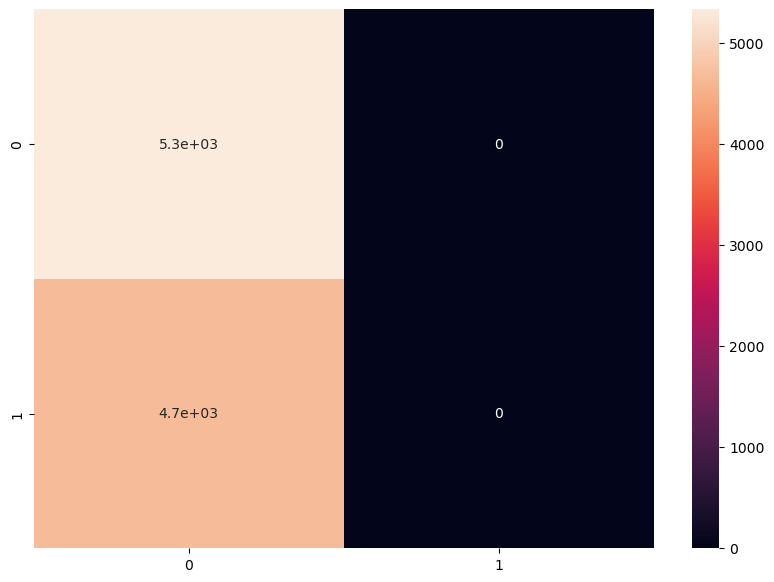

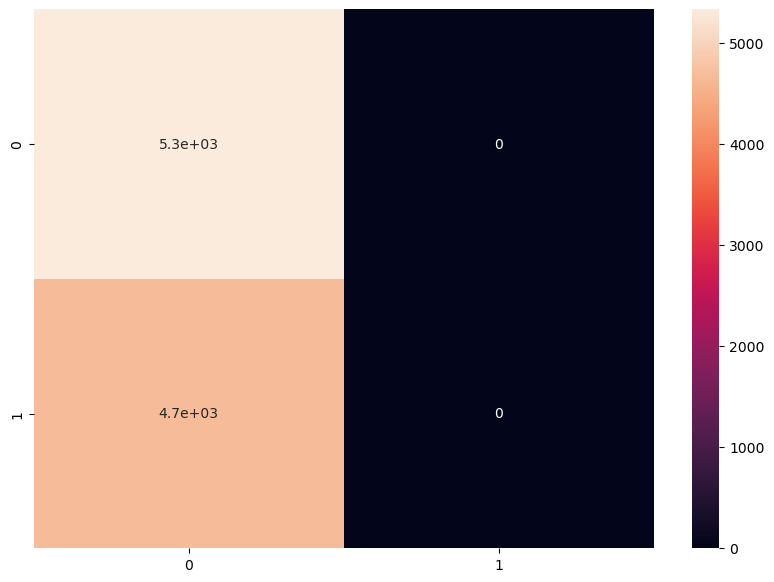

<Figure size 640x480 with 0 Axes>

In [11]:
# Compute confusion matrices
conf_matrix_sep = confusion_matrix(y_test, test_pred_sep)
conf_matrix_merged = confusion_matrix(y_test, test_pred_merged)

# Compute classification error percentage
error_rate_sep = 100 * (conf_matrix_sep[0, 1] + conf_matrix_sep[1, 0]) / (conf_matrix_sep[0, 0] + conf_matrix_sep[0, 1] + conf_matrix_sep[1, 0] + conf_matrix_sep[1, 1])
error_rate_merged = 100 * (conf_matrix_merged[0, 1] + conf_matrix_merged[1, 0]) / (conf_matrix_merged[0, 0] + conf_matrix_merged[0, 1] + conf_matrix_merged[1, 0] + conf_matrix_merged[1, 1])

print('Error rate for Separable Ring Data: {:.2f}%'.format(error_rate_sep))
print('Error rate for Merged Ring Data: {:.2f}%'.format(error_rate_merged))

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sn.heatmap(conf_matrix_sep, annot=True)
plt.show()

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sn.heatmap(conf_matrix_merged, annot=True)
plt.show()

plt.tight_layout()
plt.show()

Compute and plot ROC

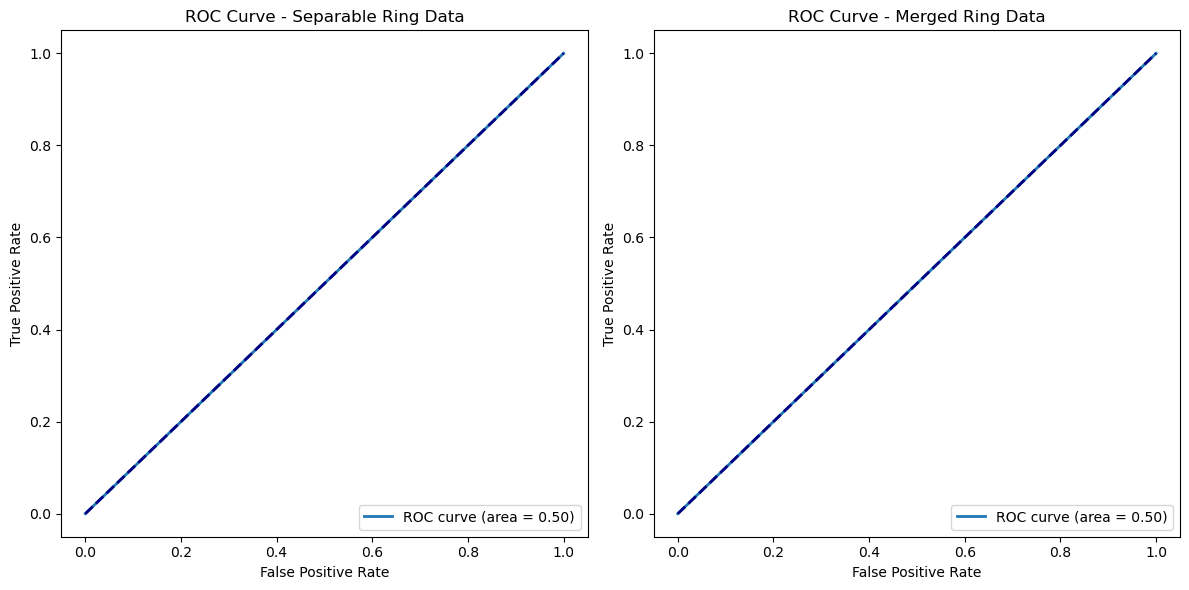

In [10]:
# Compute ROC curve and AUC for Separable Ring Data
fpr_sep, tpr_sep, _ = roc_curve(y_test, test_pred_sep)
roc_auc_sep = auc(fpr_sep, tpr_sep)

# Compute ROC curve and AUC for Merged Ring Data
fpr_merged, tpr_merged, _ = roc_curve(y_test, test_pred_merged)
roc_auc_merged = auc(fpr_merged, tpr_merged)

# Plot ROC curve
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr_sep, tpr_sep, lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_sep))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Separable Ring Data')
plt.legend(loc="lower right")

plt.subplot(1, 2, 2)
plt.plot(fpr_merged, tpr_merged, lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_merged))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Merged Ring Data')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()
